*The Big Mart dataset contains information about
 products in a store and their sales. It includes
 features like Item ID, Item Weight, Item Visibility,
 Item Type, Item MRP (Maximum Retail Price), Outlet
 ID, Outlet Type, Outlet Location, Outlet Size, and
 Item Outlet Sales*

In [3]:
!pip install pandas

In [4]:
!pip install numpy

In [5]:
!pip install matplotlib

In [6]:
!pip install seaborn

In [7]:
!pip install plotly

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [87]:
df = pd.read_csv("BigMart.csv")

In [295]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [74]:
### Rename the column name
### df.rename(columns={"Attendance (tickets sold / available)": "Attendance"}, inplace=True)

### Data Cleaning and preprocessing

In [89]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [105]:
### Null value percentage
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [116]:
### Replace null value (Null Values opperations)
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = np.where(df['Outlet_Size'].isnull(),'Medium',df['Outlet_Size'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [123]:
df.duplicated().sum()

np.int64(0)

In [127]:
### Change datatype of Outlet_Establishment_Year (column)
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


#### so the data is cleaned now...thus we are ready to move further towwards EDA(Exploratory Data Analysis)

## EDA(Exploratory Data Analysis)

In [296]:
#### How many rows and columns are there in the dataset?
rows, columns = df.shape
print("number of Rows:", rows)
print("number of columns:", columns)

number of Rows: 8523
number of columns: 12


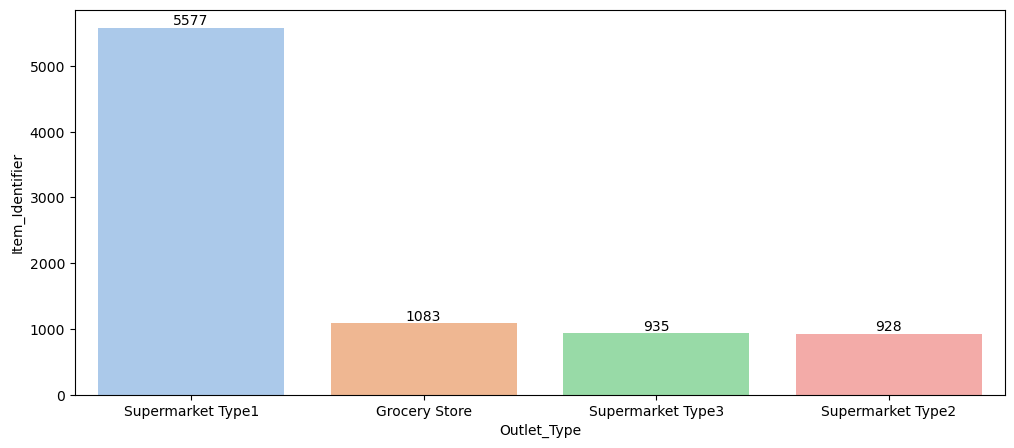

In [298]:
#### What are the different types of Outlet Types in the dataset, and how many records belong to each type?
outlet_record = df.groupby(['Outlet_Type'], as_index= False)['Item_Identifier'].count().sort_values(by='Item_Identifier', ascending= False)

plt.figure(figsize= (12,5))
ax= sns.barplot(x='Outlet_Type', y='Item_Identifier',data= outlet_record, hue= 'Outlet_Type', palette= 'pastel')

### this loop will help you to get the bar labels
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

#### *** it means supermarket type_1 has maximum records

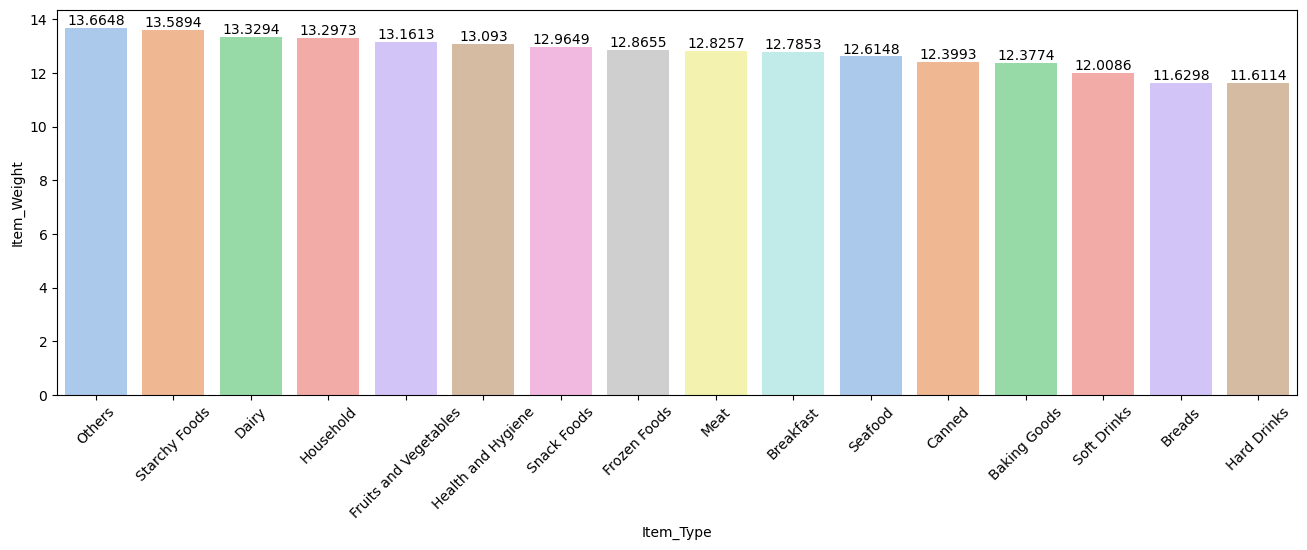

In [299]:
#### What is the average Item Weight across all products?

avg_weight = df.groupby(['Item_Type'], as_index= False)['Item_Weight'].mean().sort_values(by='Item_Weight', ascending= False)

plt.figure(figsize= (16,5))
ax= sns.barplot(x='Item_Type', y='Item_Weight',data= avg_weight, hue= 'Item_Type', palette= 'pastel')

### this loop will help you to get the bar labels
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation= 45)
plt.show()

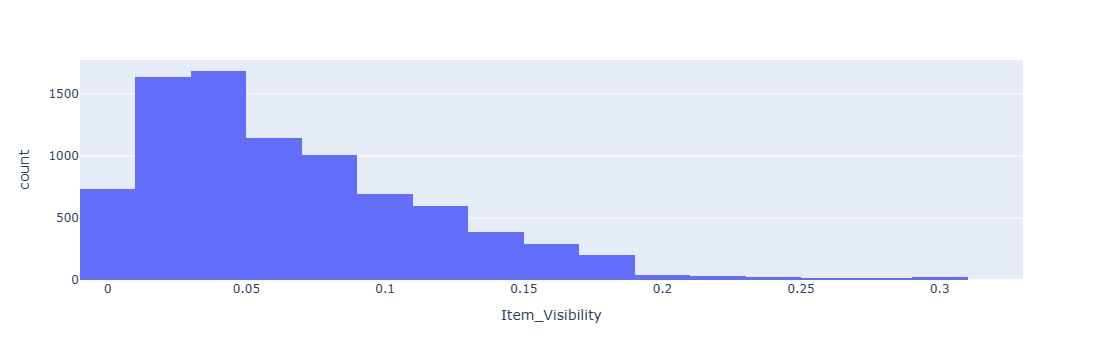

<Figure size 1000x800 with 0 Axes>

In [209]:
#### Plot a histogram of Item Visibility to visualize its distribution..

plt.figure(figsize=(10,8))
fig= px.histogram(df, x= 'Item_Visibility', nbins= 30)
fig.show()

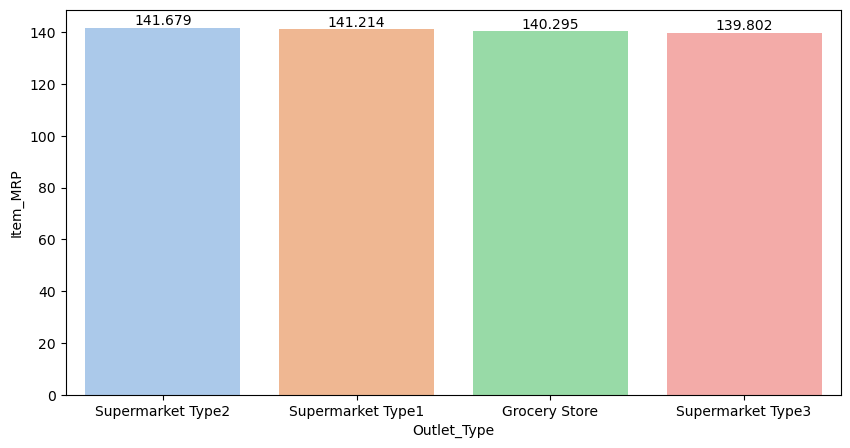

In [300]:
#### What is the average Item MRP (Maximum Retail Price) for each Outlet Type?

avg_MRP= df.groupby(['Outlet_Type'], as_index= False)['Item_MRP'].mean().sort_values(by='Item_MRP', ascending= False)

plt.figure(figsize= (10,5))
ax= sns.barplot(x='Outlet_Type', y='Item_MRP',data= avg_MRP, hue= 'Outlet_Type', palette= 'pastel')

### this loop will help you to get the bar labels
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

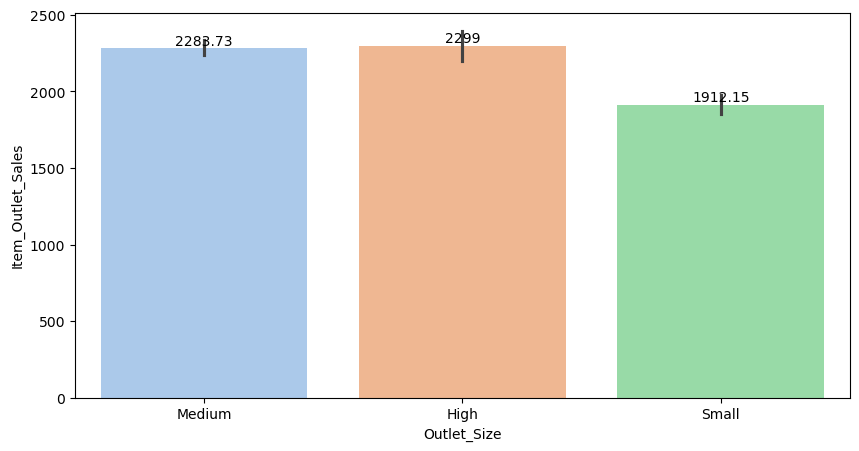

In [301]:
#### Which Outlet Size has the highest total Item Outlet Sales.
size_sales = df.groupby(['Outlet_Size'], as_index= False)['Item_Outlet_Sales'].max().sort_values(by='Item_Outlet_Sales', ascending= False)

plt.figure(figsize=(10,5))
ax= sns.barplot(x='Outlet_Size', y= 'Item_Outlet_Sales', data= df, hue= 'Outlet_Size' , palette= 'pastel')

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

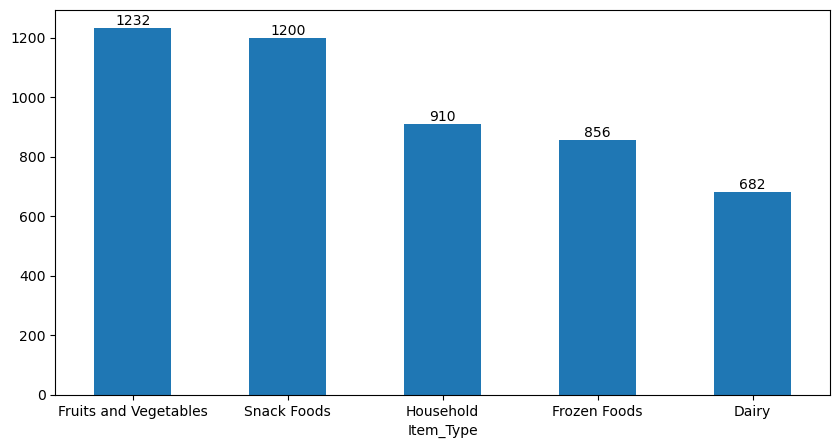

In [302]:
####  Identify and list the top 5 most common Item Types.

common_5=df['Item_Type'].value_counts().head(5)

plt.figure(figsize=(10,5))
ax= common_5.plot(kind= 'bar')

for bar in ax.containers:
    ax.bar_label(bar)

plt.xticks(rotation= 360)
plt.show()

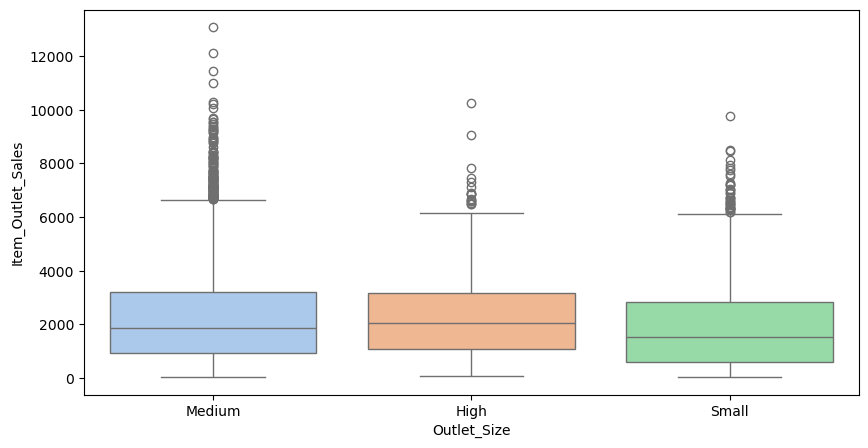

In [303]:
#### Plot a box plot of Item Outlet Sales for each Outlet Size to identify potential outliers.
df['Outlet_Size'].unique()

plt.figure(figsize=(10,5))
sns.boxplot(x= 'Outlet_Size', y= 'Item_Outlet_Sales', data= df ,hue ='Outlet_Size' , palette= 'pastel')
plt.show()

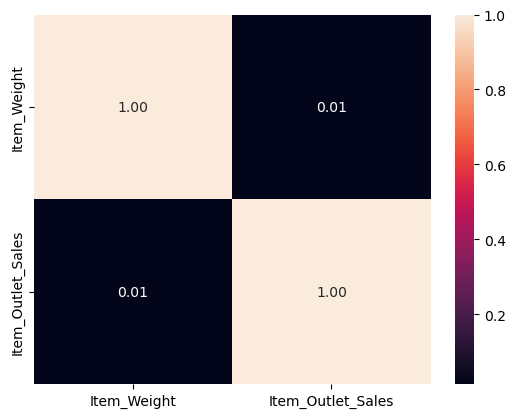

In [282]:
#### Calculate the correlation between Item Weight and Item Outlet Sales.
cor = df[['Item_Weight','Item_Outlet_Sales']].corr(method= 'spearman')
cor
sns.heatmap(cor,annot= True, fmt= '.2f')
plt.show()

In [285]:
#### Create a pivot table showing the average Item Outlet Sales for each Outlet Type and Outlet Location.
pivot = df.pivot_table(
    values= 'Item_Outlet_Sales',
    index= 'Outlet_Type',
    columns= 'Outlet_Location_Type',
    aggfunc= 'mean'  
)
pivot

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,340.329723,NaN,339.351662
Supermarket Type1,2313.099451,2323.990559,2298.995256
Supermarket Type2,NaN,NaN,1995.498739
Supermarket Type3,NaN,NaN,3694.038558


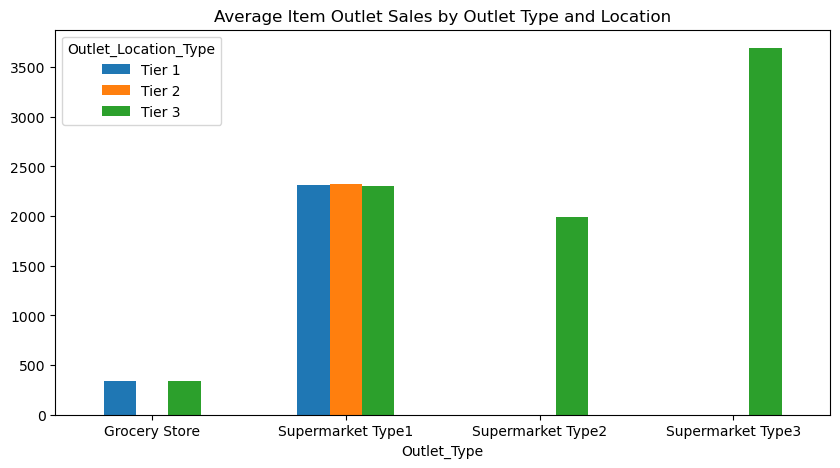

In [304]:
### Visualize the pivot table


pivot.plot(kind='bar',figsize=(10,5))
plt.title('Average Item Outlet Sales by Outlet Type and Location')
plt.xticks(rotation = 360)
plt.show()